In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("E:\\01.ATM\\RDSP\\RDSP_Txn.csv")
print(df.head())
print("Dimension", df.ndim)
print(df.shape)

  Merchant id  OB_Suc  WhatsApp_Del  Meeting_Atten  Txn_Cnt
0    I0001439       5             1              0       51
1    I0000569       1             1              0      323
2    I0001087       3             1              0       16
3    I0000740       2             0              0      152
4    I0001435       3             1              0      185
Dimension 2
(964, 5)


In [2]:
# To check correlation
df.axes
newdf=df.loc[:,['OB_Suc', 'WhatsApp_Del', 'Meeting_Atten', 'Txn_Cnt']]
print(newdf.head())

   OB_Suc  WhatsApp_Del  Meeting_Atten  Txn_Cnt
0       5             1              0       51
1       1             1              0      323
2       3             1              0       16
3       2             0              0      152
4       3             1              0      185


In [3]:
newdf.corr()

,OB_Suc,WhatsApp_Del,Meeting_Atten,Txn_Cnt
OB_Suc,1.000000,0.215136,0.099358,0.210867
WhatsApp_Del,0.215136,1.000000,0.028599,0.142017
Meeting_Atten,0.099358,0.028599,1.000000,0.046502
Txn_Cnt,0.210867,0.142017,0.046502,1.000000


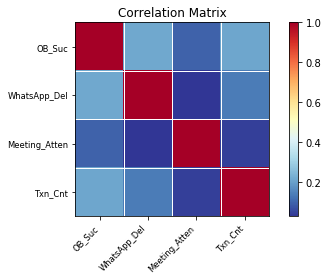

In [11]:
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg
corr_matrix = np.corrcoef(newdf.T)
smg.plot_corr(corr_matrix, xnames=newdf.columns)
plt.show()

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# OLS = Ordinary Least Squares - Regression
# smf = stats model formula

results_cal_sug_pro_fib = smf.ols('Txn_Cnt ~ OB_Suc', data=newdf).fit()
print(results_cal_sug_pro_fib.summary())

                            OLS Regression Results                            
Dep. Variable:                Txn_Cnt   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     44.77
Date:                Thu, 09 May 2019   Prob (F-statistic):           3.76e-11
Time:                        23:19:56   Log-Likelihood:                -5648.2
No. Observations:                 964   AIC:                         1.130e+04
Df Residuals:                     962   BIC:                         1.131e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.4674      3.915      8.294      0.0

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# OLS = Ordinary Least Squares - Regression
# smf = stats model formula

results_cal_sug_pro_fib = smf.ols('Txn_Cnt ~ OB_Suc + WhatsApp_Del', data=newdf).fit()
print(results_cal_sug_pro_fib.summary())

                            OLS Regression Results                            
Dep. Variable:                Txn_Cnt   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     27.57
Date:                Thu, 09 May 2019   Prob (F-statistic):           2.28e-12
Time:                        23:27:04   Log-Likelihood:                -5643.2
No. Observations:                 964   AIC:                         1.129e+04
Df Residuals:                     961   BIC:                         1.131e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       16.6052      6.361      2.610   

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# OLS = Ordinary Least Squares - Regression
# smf = stats model formula

results_cal_sug_pro_fib = smf.ols('Txn_Cnt ~ OB_Suc + WhatsApp_Del + Meeting_Atten', data=newdf).fit()
print(results_cal_sug_pro_fib.summary())

                            OLS Regression Results                            
Dep. Variable:                Txn_Cnt   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     18.58
Date:                Thu, 09 May 2019   Prob (F-statistic):           1.01e-11
Time:                        23:27:10   Log-Likelihood:                -5642.9
No. Observations:                 964   AIC:                         1.129e+04
Df Residuals:                     960   BIC:                         1.131e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.5089      6.363      2.594

                            OLS Regression Results                            
Dep. Variable:                Txn_Cnt   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     18.58
Date:                Thu, 09 May 2019   Prob (F-statistic):           1.01e-11
Time:                        23:27:45   Log-Likelihood:                -5642.9
No. Observations:                 964   AIC:                         1.129e+04
Df Residuals:                     960   BIC:                         1.131e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.5089      6.363      2.594

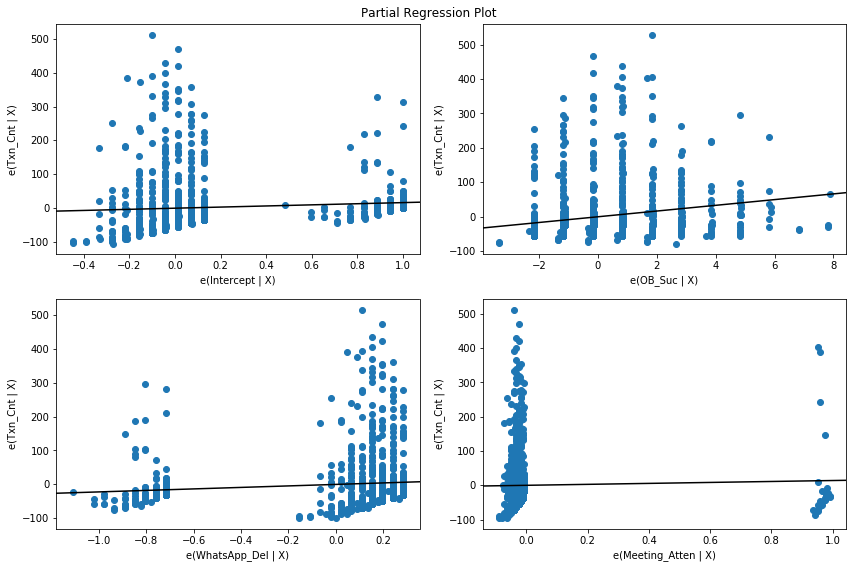

In [18]:
results_sug_fib_fat_fib = smf.ols('Txn_Cnt ~ OB_Suc + WhatsApp_Del + Meeting_Atten', data=newdf).fit()
print(results_sug_fib_fat_fib.summary())

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results_sug_fib_fat_fib, fig=fig)